In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ANZ=pd.read_excel("ANZ synthesised transaction dataset.xlsx")
ANZ.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
ANZ.shape

(12043, 23)

In [4]:
ANZ.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [5]:
ANZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [6]:
ANZ.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [7]:
#Replacing the missing value with mode (Categorical Data)
ANZ['card_present_flag'].fillna((ANZ['card_present_flag'].mode().values[0]), inplace=True)

In [12]:
ANZ.isnull().sum()

status                  0
card_present_flag       0
account                 0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
customer_id             0
merchant_long_lat    4326
movement                0
dtype: int64

In [11]:
# Deleting the unneccesary columns in the data
ANZ=ANZ.drop(["currency","merchant_code","country","bpay_biller_code"],axis=1)

In [13]:
ANZ.shape

(12043, 19)

In [15]:
# Days in which Maximum No of transaction recorded
maxx=ANZ["date"].value_counts()
print("Days in which maximum transaction recorded")
print(maxx.head(10))
print("Days in which maximum transaction recorded")
print(maxx.tail(10))

Days in which maximum transaction recorded
2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
2018-09-21    160
2018-10-03    160
2018-10-04    159
2018-09-27    159
2018-10-19    158
Name: date, dtype: int64
Days in which maximum transaction recorded
2018-09-10    103
2018-10-29    102
2018-10-16    102
2018-09-24    101
2018-08-05    100
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, dtype: int64


In [18]:
# Top 10 customer's who had done a maximum transaction in 3 month's
maximum=ANZ["customer_id"].value_counts()
print("Top 10 customer's who had done a maximum transaction in 3 month's")
maximum.head(10)

Top 10 customer's who had done a maximum transaction in 3 month's


CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
CUS-1196156254    245
CUS-51506836      239
CUS-2695611575    239
CUS-860700529     233
CUS-1669695324    230
Name: customer_id, dtype: int64

In [19]:
print("Bottom 10 customer's who had done a minimum transaction in 3 month's")
maximum.tail(10)

Bottom 10 customer's who had done a minimum transaction in 3 month's


CUS-3174332735    51
CUS-3151318058    49
CUS-326006476     47
CUS-2977593493    44
CUS-1233833708    44
CUS-3395687666    40
CUS-3201519139    37
CUS-1646183815    34
CUS-495599312     31
CUS-1739931018    25
Name: customer_id, dtype: int64

In [20]:
date_mean = ANZ.groupby("date")["amount"].mean().reset_index()

<Figure size 1152x432 with 0 Axes>

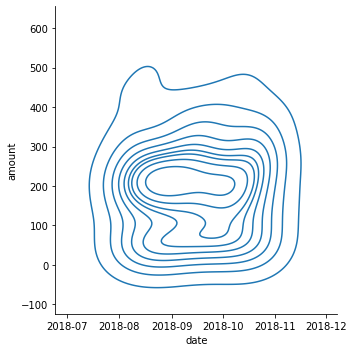

In [26]:
plt.figure(figsize=(16, 6))
sns.displot(y="amount",x="date", kind="kde", data=date_mean)

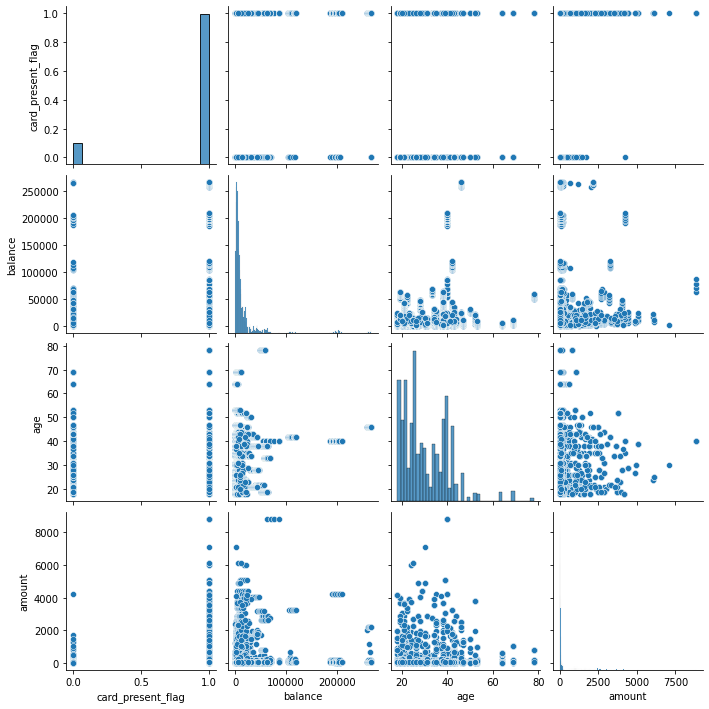

In [28]:
sns.pairplot(ANZ)

In [30]:
# Visualising the Male Vs Female - Spending Habits
gender_mean = ANZ.groupby(["date","gender"])["amount"].mean().reset_index()
gender_mean.head()

,date,gender,amount
0,2018-08-01,F,191.952676
1,2018-08-01,M,246.050000
2,2018-08-02,F,85.452899
3,2018-08-02,M,191.446627
4,2018-08-03,F,216.349241


In [32]:
# Transaction are done in different states of Australia
merchant_state_total = ANZ.groupby(["merchant_state","gender"])["amount"].sum().reset_index()
merchant_state_total

,merchant_state,gender,amount
0,ACT,F,1657.44
1,ACT,M,3219.24
2,NSW,F,41430.88
3,NSW,M,60590.89
4,NT,F,8741.42
5,NT,M,427.47
6,QLD,F,28611.05
7,QLD,M,24872.40
8,SA,F,11349.73
9,SA,M,5426.84


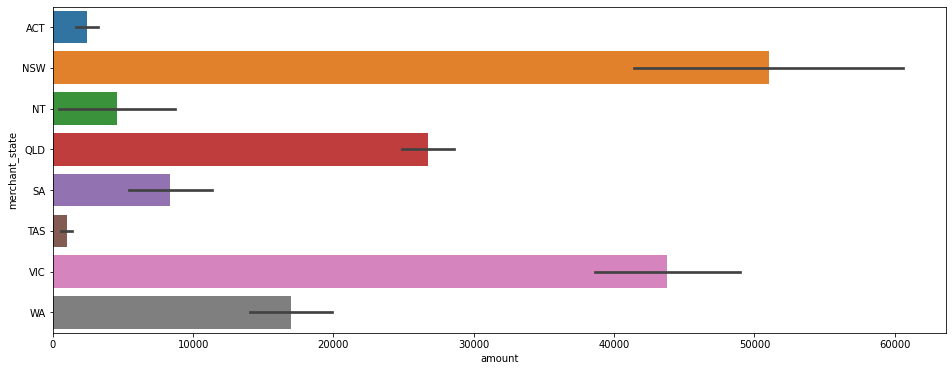

In [35]:
plt.figure(figsize=(16, 6))
sns.barplot(x="amount", y="merchant_state",  data=merchant_state_total)

We observe that highest Amount spent has been recorded in the state of NSW and VIC

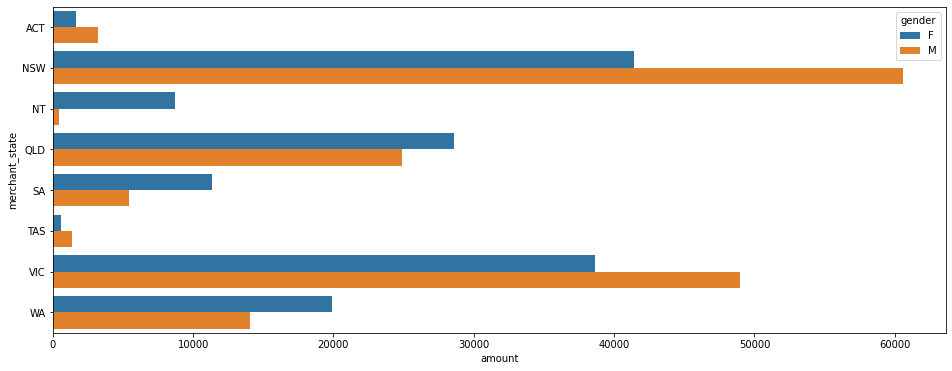

In [36]:
# Highest Amount spent as per state and gender is given below
plt.figure(figsize=(16, 6))
sns.barplot(x="amount", y="merchant_state", hue="gender", data=merchant_state_total)

Highest amount spent is seen by male counterpart as compared to females.

In [37]:
# Genderwise usage statistics of debit and credit card

debit_credit= ANZ.groupby(["movement","gender"])["amount"].mean().reset_index()
debit_credit

,movement,gender,amount
0,credit,F,1679.370477
1,credit,M,2096.811681
2,debit,F,49.946881
3,debit,M,54.980407
